## Régression logistique

## dans ces données, nous voulons savoir si un client va cliquer sur add base sur les données historiques du site Web

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set(rc={'figure.figsize' : (16 , 9)} , font_scale=1.3 , style='whitegrid' , palette="Set1")

In [3]:
df = pd.read_csv('advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


# résumé statistique

In [5]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [6]:
df.describe().columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Clicked on Ad'],
      dtype='object')

## Graph de distribution

distribution de la colonne : Daily Time Spent on Site


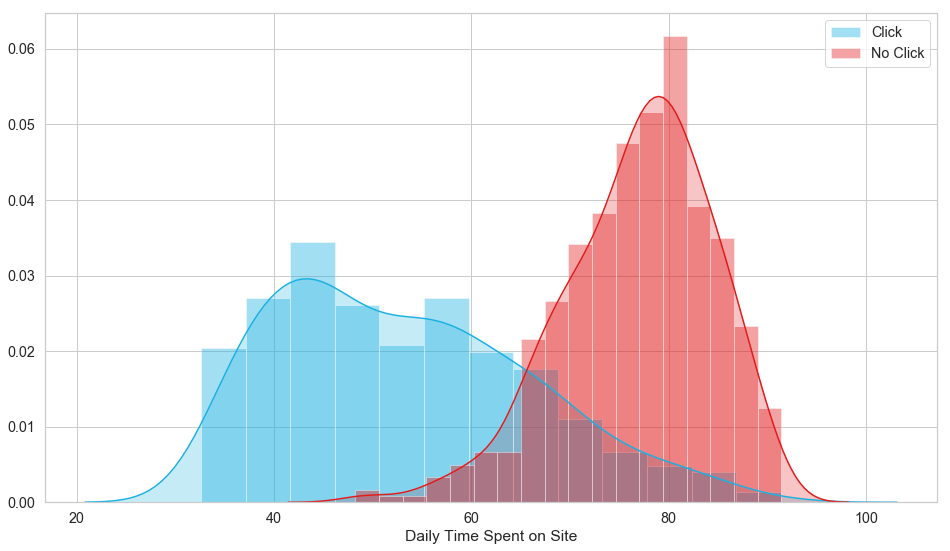

-----------   ---------------------------------   -----------
distribution de la colonne : Age


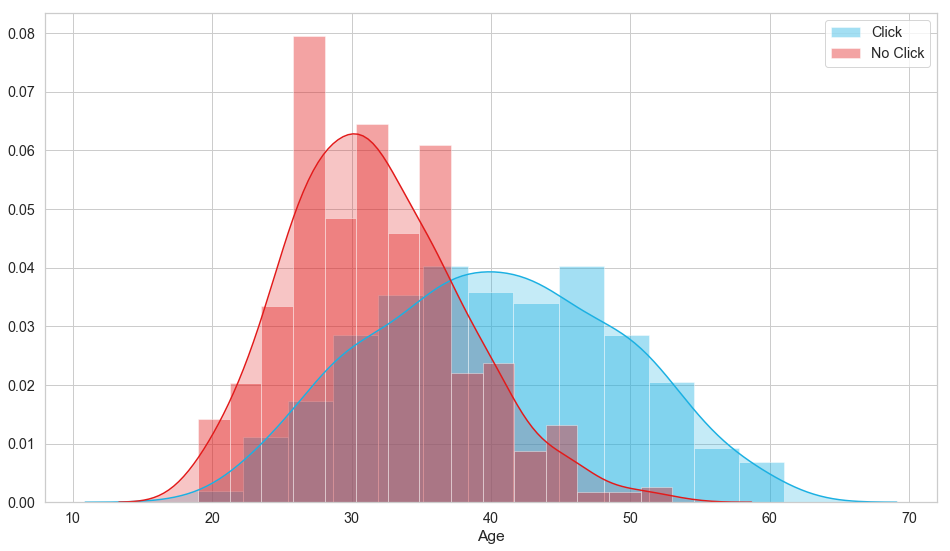

-----------   ---------------------------------   -----------
distribution de la colonne : Area Income


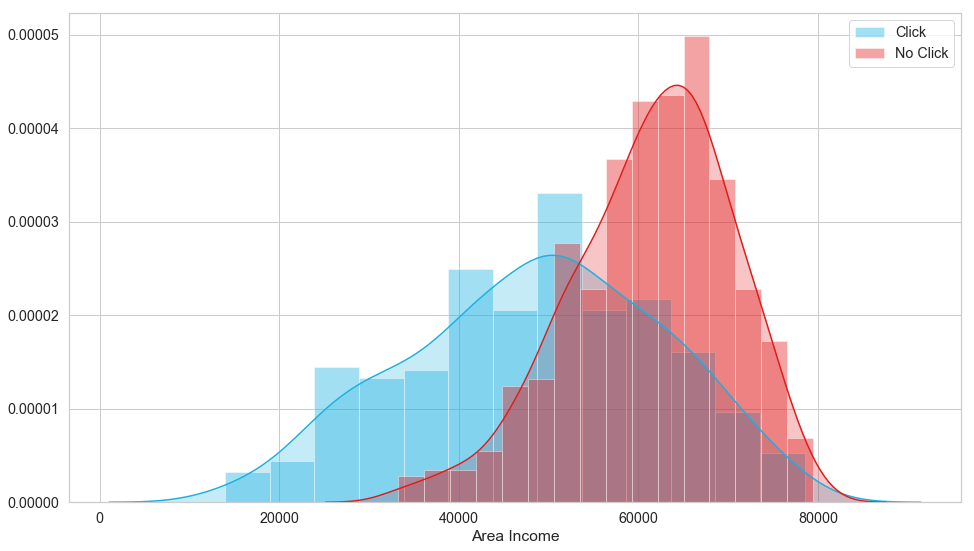

-----------   ---------------------------------   -----------
distribution de la colonne : Daily Internet Usage


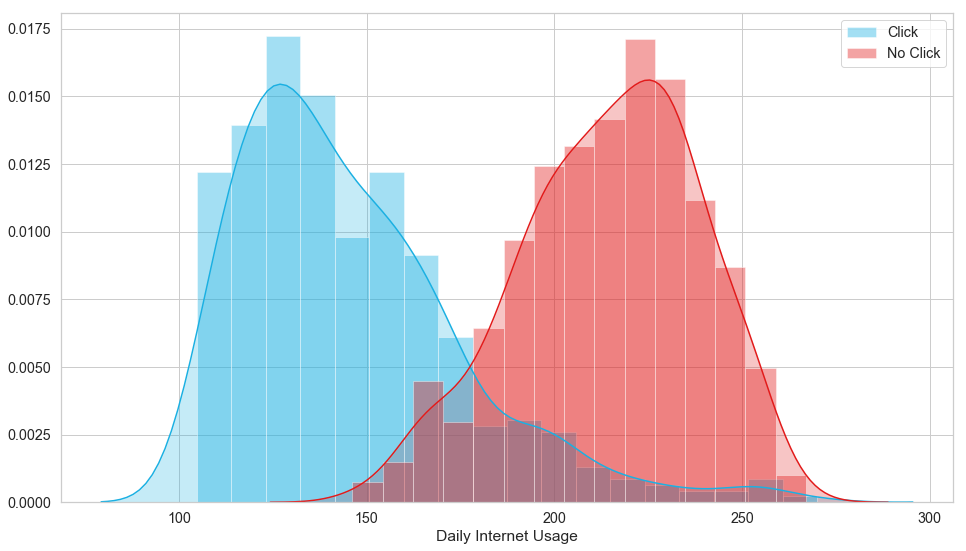

-----------   ---------------------------------   -----------
distribution de la colonne : Male


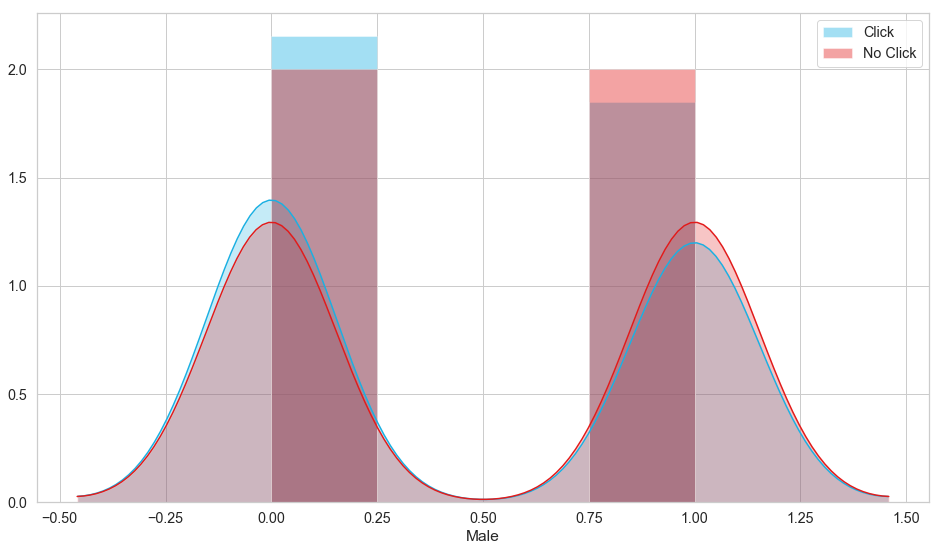

-----------   ---------------------------------   -----------


In [7]:
for i in ['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male'] :
    print("distribution de la colonne : " + i)
    sns.distplot(df[df['Clicked on Ad']==1][i] , label="Click", kde_kws={'shade':True} ,color="#1bb0e2")
    sns.distplot(df[df['Clicked on Ad']==0][i], label="No Click", kde_kws={'shade':True} , color='#e21b1b')
    plt.legend()
    plt.show()
    print('-----------   ---------------------------------   -----------')

## Graph de distribution de l'âge et du revenu de la région

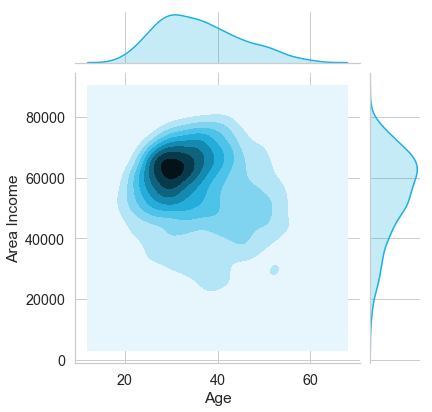

In [8]:
sns.jointplot(x='Age',y='Area Income',data=df , kind="kde" , height=6,color="#1bb0e2")

## Graph de distribution de l'âge et du temps passé sur le site

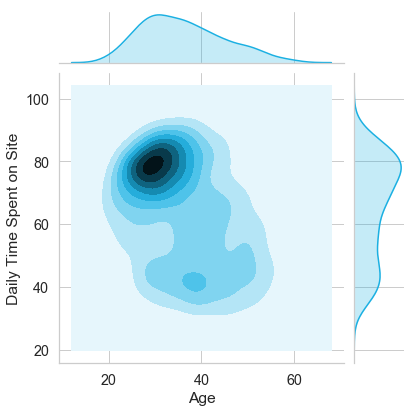

In [9]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=df,kind='kde',height=6,color="#1bb0e2")

## Graph de distribution du temps  passé sur le site et de l'utilisation d'Internet

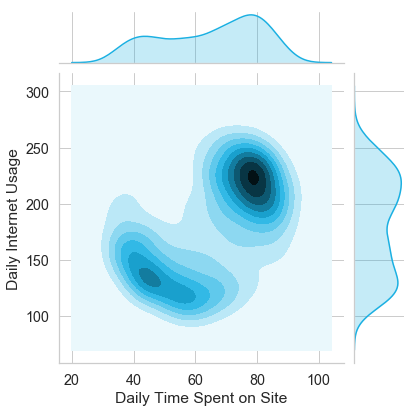

In [10]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=df,kind='kde',height=6,color="#1bb0e2")

## la probabilité qu'un client clique sur une annonce en fonction du temps passé sur le site Web( l'axe y represent la probabilité 0=0% , 1=100%)
### Rouge pour Femme
### Bleu pour homme

- les femmes sont plus susceptibles de cliquer sur les annonces

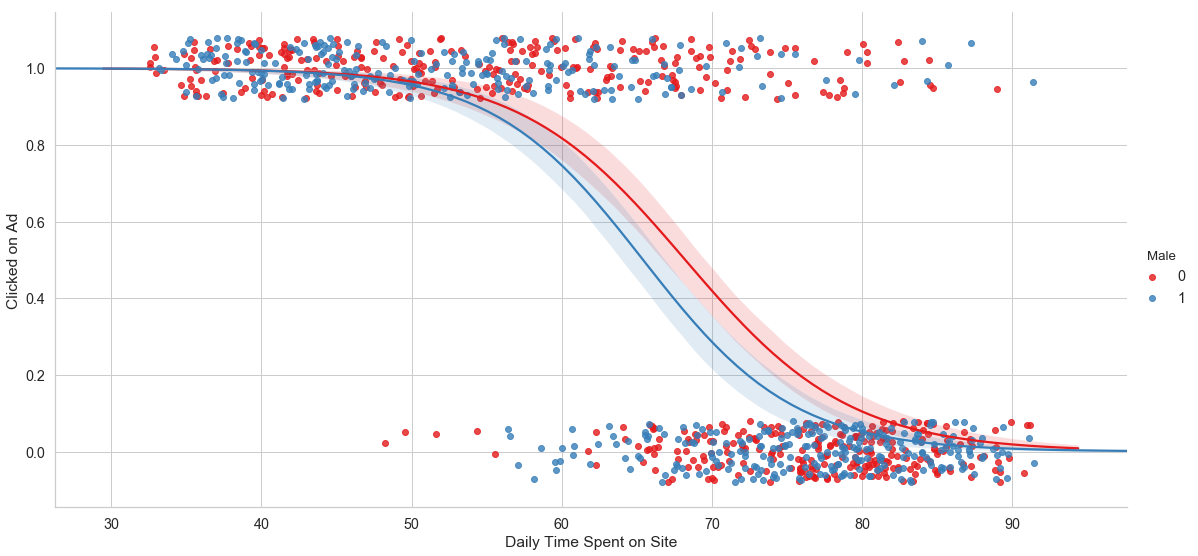

In [11]:
sns.lmplot(y='Clicked on Ad' , x='Daily Time Spent on Site' , data=df , logistic=True , y_jitter=0.08 , height=8 , aspect=2 , hue='Male' , palette='Set1')

## la probabilité qu'un client clique sur une annonce en fonction de son âge
- il semble que plus l'âge du client est élevé le plus de chance qu'ils cliquent sur l'annonce

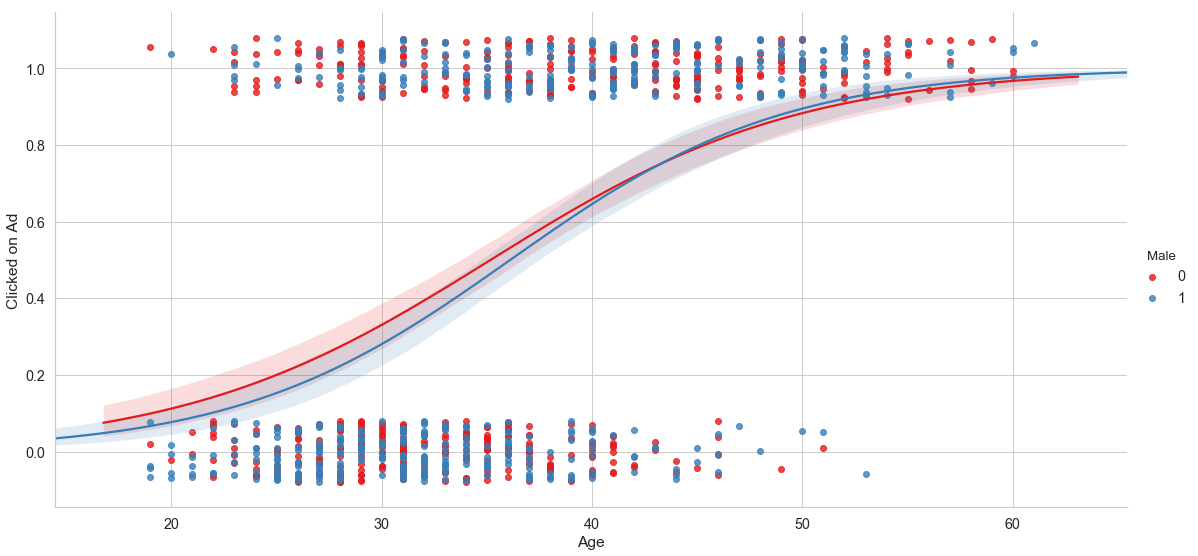

In [12]:
sns.lmplot(y='Clicked on Ad' , x='Age' , data=df , logistic=True , y_jitter=0.08 , height=8 , aspect=2 , hue='Male' , palette='Set1')

## la probabilité qu'un client clique sur une annonce en fonction du revenu de la zone

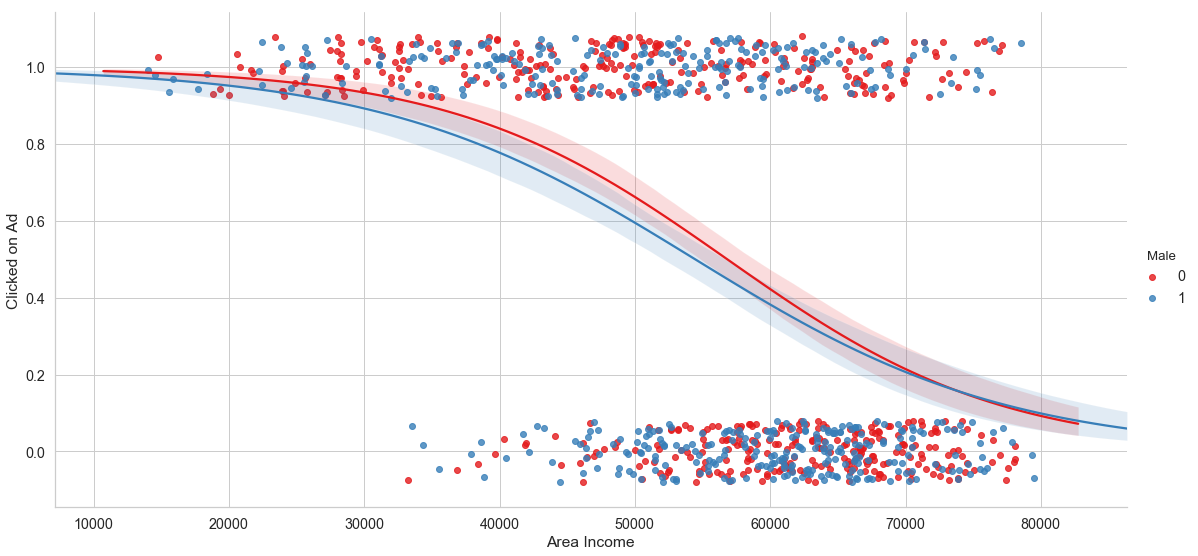

In [13]:
sns.lmplot(y='Clicked on Ad' , x='Area Income' , data=df , logistic=True , y_jitter=0.08 , height=8 , aspect=2 , hue='Male' , palette='Set1')

## la probabilité qu'un client clique sur une annonce en fonction de l'utilisation quotidienne d'Internet

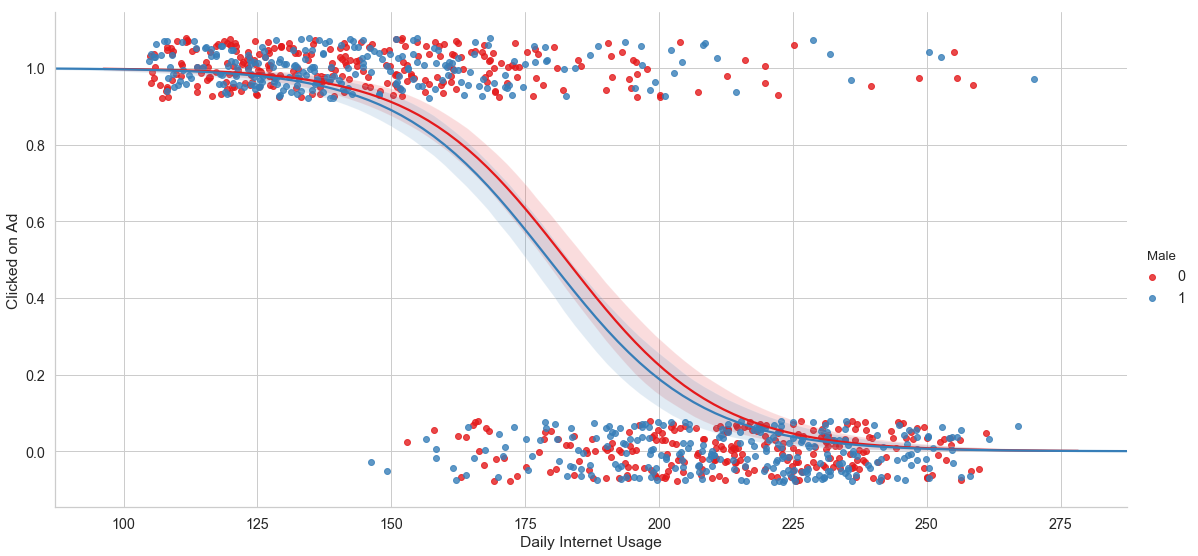

In [14]:
sns.lmplot(y='Clicked on Ad' , x='Daily Internet Usage' , data=df , logistic=True , y_jitter=0.08 , height=8 , aspect=2 , hue='Male' , palette='Set1')

# model régression logistique

In [15]:
from sklearn.model_selection import train_test_split
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [16]:
y = df['Clicked on Ad']
X = df[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [17]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
lm.fit(X_train , y_train)

C:\Users\Yasha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## notre modèle a une précision de 92% 

In [18]:
from sklearn.metrics import classification_report
print(classification_report(lm.predict(X_test) , y_test))

              precision    recall  f1-score   support

           0       0.98      0.84      0.91        51
           1       0.86      0.98      0.91        49

   micro avg       0.91      0.91      0.91       100
   macro avg       0.92      0.91      0.91       100
weighted avg       0.92      0.91      0.91       100

